In [1]:
# This code below is to se the structure of the code for Pyramidal Neuron - Larkum style
# Learning through target spikes

import numpy as np

from lttb import LTTB

import matplotlib.pyplot as plt

from tqdm import trange
import random


N, I, O, T = 500, 20, 3, 400
shape = (N, I, O, T)

dt = .001
tau_m = 20. * dt
tau_s = 2. * dt
tau_ro = 10. * dt
tau_star = 20. * dt
tau_W = 200 * dt

beta = np.exp(-dt/tau_s)
beta_ro = np.exp(-dt/tau_ro)
beta_targ = np.exp(-dt/tau_star)
beta_W = np.exp(-dt/tau_W)

sigma_targ = 10**.5
sigma_in = 12.*2.

dv = 1 / 500.
alpha = .005
alpha_rout = .01
Vo = - 4
h = - 1
s_inh = 20

sigma_Jrec = 5.
sigma_wrec = 0.
sigma_Jout = 0.1
sigma_context = 10.

Ne = 400
Ni = 100

N = Ne+Ni

n_contexts = 2

# Here we build the dictionary of the simulation parameters
par = {'dt' : dt, 'tau_m' : tau_m, 'tau_s' : tau_s, 'tau_ro' : tau_ro, 'tau_star' : tau_star,'tau_W' : tau_W,
       'dv' : dv, 'Vo' : Vo, 'h' : h, 's_inh' : s_inh,
       'N' : N, 'Ni' : Ni, 'Ne' : Ne, 'T' : T, 'I' : I, 'O' : O, 'shape' : shape, 
       'sigma_Jrec' : sigma_Jrec,'sigma_wrec' : sigma_wrec, 'sigma_Jout' : sigma_Jout, 'n_contexts' : n_contexts,
       'alpha' : alpha, 'alpha_rout' : alpha_rout,'sigma_context' : sigma_context,
       'sigma_in' : sigma_in, 'sigma_targ' : sigma_targ, 'h' : h}

nStepOutTraining = 1000

t_shut = 10

JMAX = 100.
nu_targ = 0.005


# Here we init our (recurrent) agent
lttb = LTTB (par)


In [2]:
"""
jp = lttb.j_in
jm = lttb.j_in

threshold = 12

jp = np.heaviside(jp-threshold,0)*20
jm = np.heaviside(-(jm- (-threshold)),0)*-20

lttb.j_in = jp+jm
"""

'\njp = lttb.j_in\njm = lttb.j_in\n\nthreshold = 12\n\njp = np.heaviside(jp-threshold,0)*20\njm = np.heaviside(-(jm- (-threshold)),0)*-20\n\nlttb.j_in = jp+jm\n'

In [3]:
jp = lttb.j_cont
jm = lttb.j_cont

threshold = 5

jp = np.heaviside(jp-threshold,0)
jm = -np.heaviside(-(jm- (-threshold)),0)*-20

lttb.j_cont = jp#+jm

In [4]:
"""
jp = lttb.j_targ
jm = lttb.j_targ

threshold = sigma_targ

jp = np.heaviside(jp-threshold,0)*20
jm = np.heaviside(-(jm- (-threshold)),0)*-20

lttb.j_targ = jp+jm
"""

'\njp = lttb.j_targ\njm = lttb.j_targ\n\nthreshold = sigma_targ\n\njp = np.heaviside(jp-threshold,0)*20\njm = np.heaviside(-(jm- (-threshold)),0)*-20\n\nlttb.j_targ = jp+jm\n'

(array([602.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 398.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

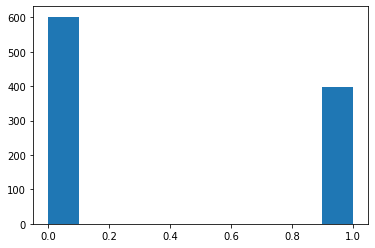

In [5]:


lttb.j_cont = lttb.j_cont*0

lttb.j_cont[0:199,0] = 1
lttb.j_cont[200:399,1] = 1
plt.hist(lttb.j_cont.flatten())

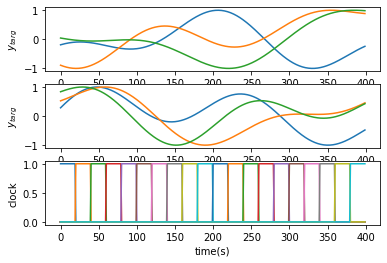

In [6]:
# define clock and target

lttb.init_targ(par)
lttb.y_targ_1 = lttb.y_targ

lttb.init_targ(par)
lttb.y_targ_2 = lttb.y_targ

lttb.init_clock(par)


plt.figure()
plt.subplot(311)
plt.plot(np.array(lttb.y_targ_1).T)
plt.ylabel('$y_{targ}$')
plt.subplot(312)
plt.plot(np.array(lttb.y_targ_2).T)
plt.ylabel('$y_{targ}$')
plt.subplot(313)
plt.plot(np.array(lttb.I_clock).T)
plt.xlabel('time(s)')
plt.ylabel('clock')
plt.show()


In [7]:
lttb.cont = lttb.cont*0
lttb.cont[0] = 1
print(lttb.j_cont@lttb.cont)

lttb.cont = lttb.cont*0
lttb.cont[1] = 1
print(lttb.j_cont@lttb.cont)




[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

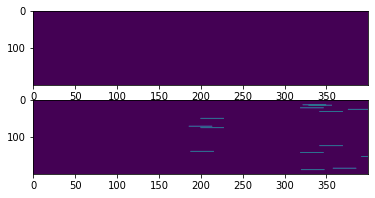

0.3620360675594468


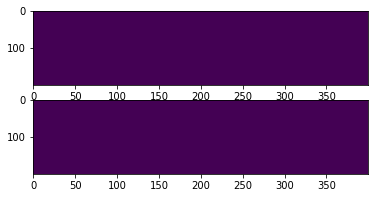

0.3642233358333596


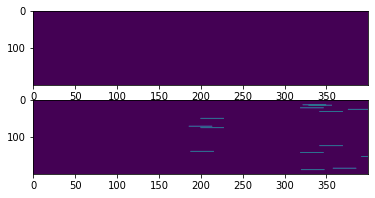

0.24980026463053612


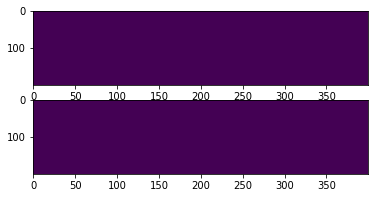

0.21291439289624378


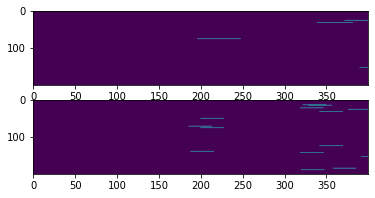

0.2755773116216189


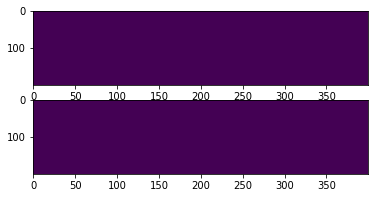

0.14936868894202898


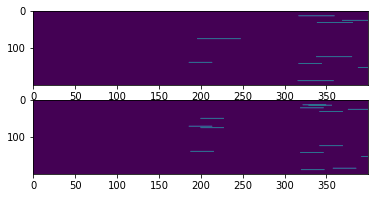

0.2773590415140337


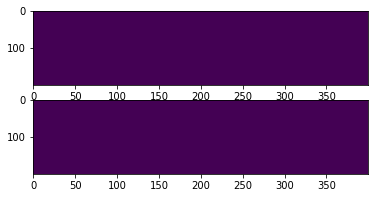

0.11804218442873154


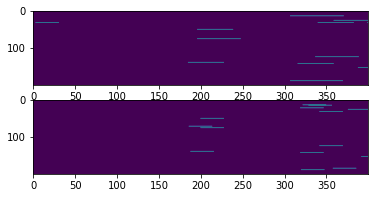

0.2536759218011735


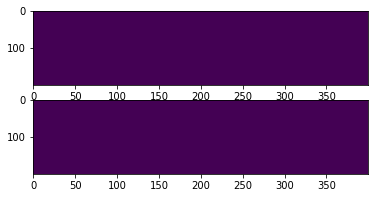

0.10351956553618168


In [13]:
## Training Rec

lttb.J = lttb.J*0
lttb.Jout = lttb.Jout*0

gamma = 10.
def f(x,gamma):
    return np.exp(x*gamma)/(np.exp(x*gamma)+1)
#f1 = @(x)(gamma*exp(gamma*x))./(exp(gamma*x)+1)-(gamma*exp(2*gamma*x))./(exp(gamma*x)+1).^2;

apicalFactorTrain = 1
apicalFactorTest = 0

nIterRec = 5

eta = 40.
eta_out = 0.1
etaW = .0

overlap = np.zeros((n_contexts,nIterRec))

for iter in range(nIterRec):
    
    ###### Online-Training

    #initialize simulation
    
    W_TARG = []
    
    for cont_index in range(2):
    
        lttb.cont = lttb.cont*0
        lttb.cont[cont_index] = 1
        if cont_index ==0:
            lttb.y_targ = lttb.y_targ_1
        else:
            lttb.y_targ = lttb.y_targ_2
    

        lttb.initialize(par)

        #run simulation
        dH = 0

        for t in range(lttb.T-2):
            
            lttb.step_mult_cont(apicalFactor = apicalFactorTrain)

            dH = dH*(1-dt/tau_m) + dt/tau_m*lttb.S_filt[:,t]

            #DJ = np.outer(( lttb.S_apic_dist[:,t+1] - f(lttb.VapicRec[:,t],gamma) )*lttb.S_wind_soma[:,t+1] *(1-lttb.S_apic_dist[:,t]) ,dH)
            DJ = np.outer(( lttb.S_apic_dist[:,t+1] - f(lttb.VapicRec[:,t],gamma) )*lttb.S_wind_soma[:,t+1] *(1-lttb.S_apic_dist[:,t]) ,dH)
            #DJ = np.outer(( lttb.S_apic_dist[:,t+1] - .005  )*lttb.S_wind_soma[:,t+1] *(1-lttb.S_apic_dist[:,t]) ,dH)
            

            SR = lttb.S_filtRO[:,t+1]#lttb.B_filt_rec[:,t+1]#
            Y = lttb.Jout@SR
            DJRO = np.outer(lttb.y_targ[:,t+1] - Y,SR.T)
            
            if iter>0:
                lttb.J =  lttb.J + eta*DJ
                lttb.Jout =  lttb.Jout + eta_out*DJRO
            
            
        W_TARG.append(lttb.S_wind_targ)
        
    ###### Test
    
    if 1:#iter%5==0:

        for cont_index in range(2):

            lttb.cont = lttb.cont*0
            lttb.cont[cont_index] = 1
            
            if cont_index ==0:
                lttb.y_targ = lttb.y_targ_1
            else:
                lttb.y_targ = lttb.y_targ_2

            lttb.initialize(par)

            #run simulation

            for t in range(lttb.T-2):
                
                lttb.step_mult_cont(apicalFactor = apicalFactorTest)
                
            overlap[cont_index,iter]=(np.sum(np.abs(W_TARG[cont_index]*lttb.S_wind_pred))/np.sum(np.abs(W_TARG[cont_index])) )

            SR = lttb.S_filtRO[:,1:-2]# lttb.B_filt_rec[:,1:-2]#
            Y = lttb.Jout@SR
            mse_rec_train = np.std(lttb.y_targ[:,1:-2] - Y)**2
            
            plt.figure(figsize=(6,3))
            plt.subplot(211)
            plt.imshow(lttb.S_wind_pred[0:200,:],aspect='auto')
            plt.subplot(212)
            plt.imshow(W_TARG[cont_index][0:200,:],aspect='auto')
            plt.show()

            print(mse_rec_train)
            

Text(0.5, 0, 'iteration')

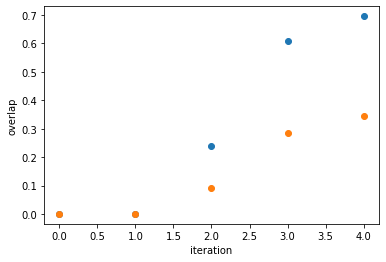

In [14]:
plt.figure()
plt.plot(overlap.T,'o')
plt.ylabel('overlap')
plt.xlabel('iteration')


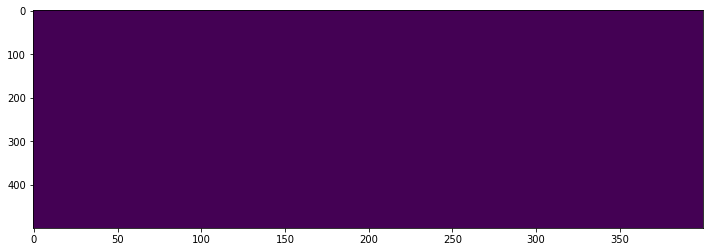

In [27]:
plt.figure(figsize=(12,4))
plt.imshow(lttb.S_apic_dist,aspect = 'auto')
plt.show()

0.6341669515963336


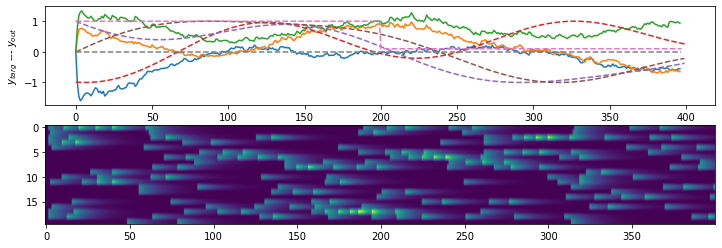

0.41050272006179356


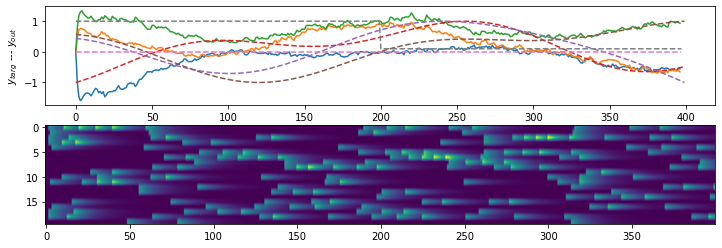

In [28]:
for cont_index in range(2):
    
    context = []

    lttb.cont = lttb.cont*0
    lttb.cont[cont_index] = 1

    if cont_index ==0:
        lttb.y_targ = lttb.y_targ_1
    else:
        lttb.y_targ = lttb.y_targ_2

    lttb.initialize(par)

    #run simulation
    
    apicalFactor = 0

    for t in range(lttb.T-2):
 
        if t==200:
            apicalFactor = 0
            lttb.cont = lttb.cont*0.1
            #lttb.cont[0] = 1
        context.append(lttb.cont)
          
        lttb.step_mult_cont(apicalFactor = apicalFactor)

    SR = lttb.S_filtRO[:,1:-2]#lttb.B_filt_rec[:,1:-2]#
    Y = lttb.Jout@SR
    mse_rec_train = np.std(lttb.y_targ[:,1:-2] - Y)**2

    print(mse_rec_train)
    
#mse, Y = lttb.train_ro(par,out_epochs = 1)

    plt.figure(figsize=(12, 4))
    plt.subplot(211)
    plt.plot(Y.T)
    plt.plot(lttb.y_targ.T,'--')
    plt.plot(np.array(context),'--')
    
    plt.xlabel('time(s)')
    plt.ylabel('$y_{targ}$ --- $y_{out}$')
    plt.subplot(212)
    plt.imshow(lttb.S_filtRO[0:20,:],aspect='auto')
    
    #plt.subplot(313)
    #plt.imshow(lttb.S_wind[0:20,:],aspect='auto')
    
    plt.show()

0.6011576851975652


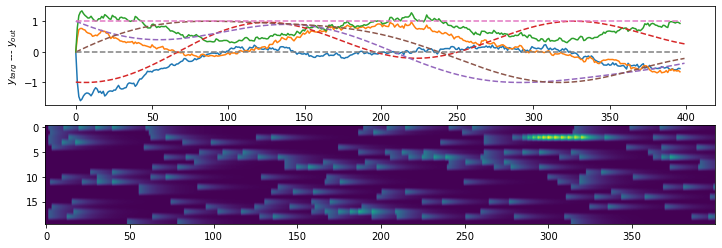

0.40085131732317103


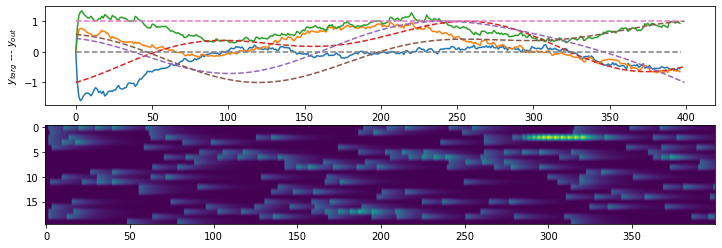

0.7672204612028708


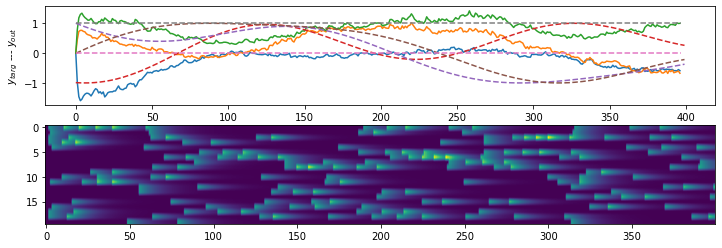

0.41273137462542614


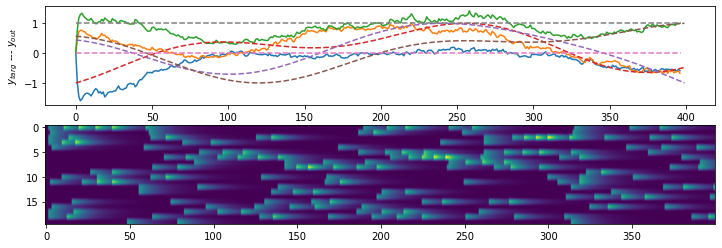

In [29]:
MSE = np.zeros((2,2))

for cont_index_i in range(2):
    for cont_index in range(2):

        context = []

        lttb.cont = lttb.cont*0
        lttb.cont[cont_index_i] = 1

        if cont_index ==0:
            lttb.y_targ = lttb.y_targ_1
        else:
            lttb.y_targ = lttb.y_targ_2

        lttb.initialize(par)

        #run simulation

        apicalFactor = 0

        for t in range(lttb.T-2):

            if t==200:
                apicalFactor = 0
                #lttb.cont = lttb.cont*0.1
                #lttb.cont[0] = 1
            context.append(lttb.cont)

            lttb.step_mult_cont(apicalFactor = apicalFactor)

        SR = lttb.S_filtRO[:,1:-2]#lttb.B_filt_rec[:,1:-2]#
        Y = lttb.Jout@SR
        mse_rec_train = np.std(lttb.y_targ[:,1:-2] - Y)**2

        print(mse_rec_train)
        MSE[cont_index_i,cont_index] = mse_rec_train

    #mse, Y = lttb.train_ro(par,out_epochs = 1)

        plt.figure(figsize=(12, 4))
        plt.subplot(211)
        plt.plot(Y.T)
        plt.plot(lttb.y_targ.T,'--')
        plt.plot(np.array(context),'--')

        plt.xlabel('time(s)')
        plt.ylabel('$y_{targ}$ --- $y_{out}$')
        plt.subplot(212)
        plt.imshow(lttb.S_filtRO[0:20,:],aspect='auto')

        #plt.subplot(313)
        #plt.imshow(lttb.S_wind[0:20,:],aspect='auto')

        plt.show()

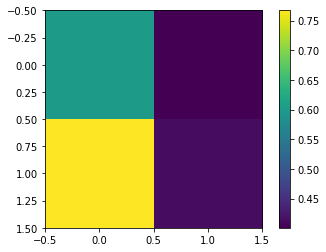

In [30]:
plt.imshow(MSE)
plt.colorbar()

0.7967171717171717


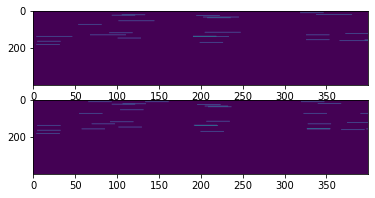

0.31785200857835016
0.5416666666666666


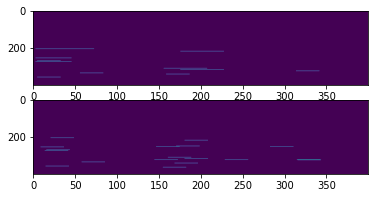

0.19387125575271874
0.7967171717171717


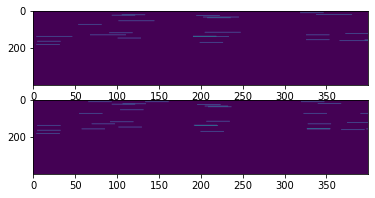

0.38160281199965357
0.6448412698412699


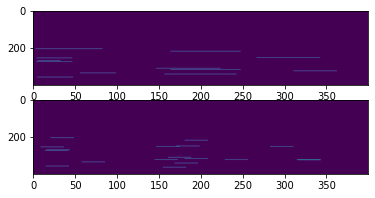

0.07393168023328275
0.7967171717171717


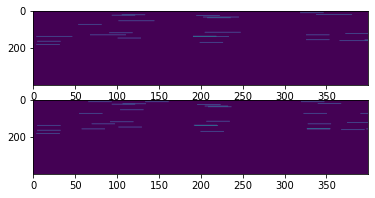

0.4425007815554392
0.7678571428571429


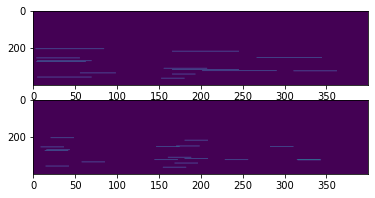

0.04484005620297392
0.7967171717171717


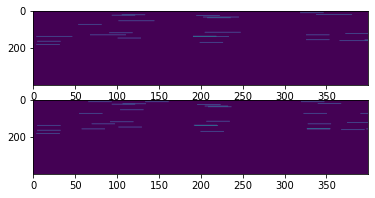

0.4592116791997913
0.7777777777777778


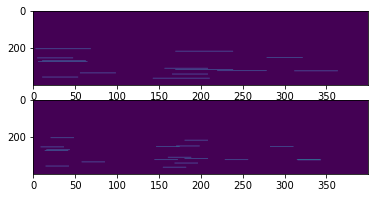

0.029654051584775284
0.7967171717171717


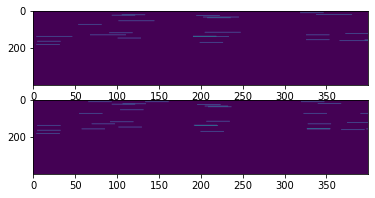

0.4462633143690472
0.8273809523809523


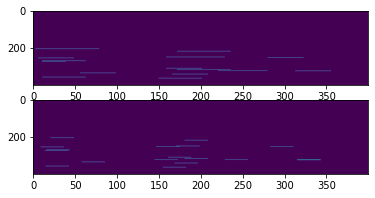

0.020724564070617926
0.7967171717171717


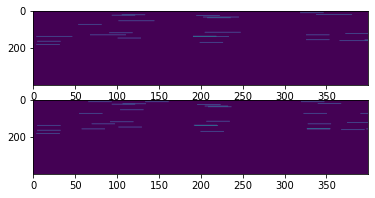

0.4154561825198259
0.8253968253968254


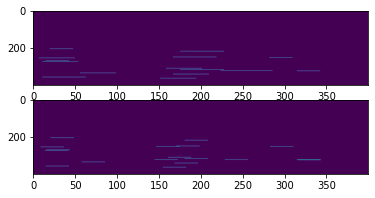

0.010576994936882375
0.7967171717171717


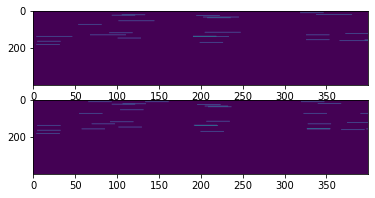

0.39354748282217134
0.8809523809523809


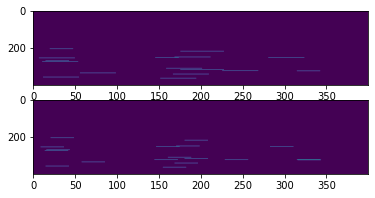

0.005868396155400809
0.7967171717171717


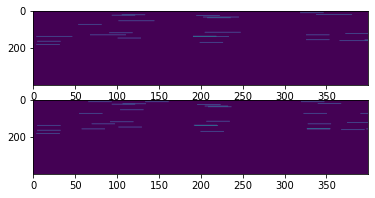

0.37799068729646323
0.876984126984127


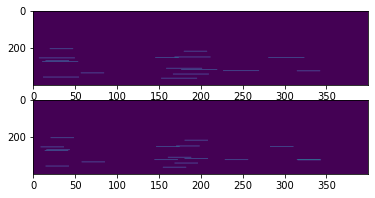

0.004508559115641904
0.7967171717171717


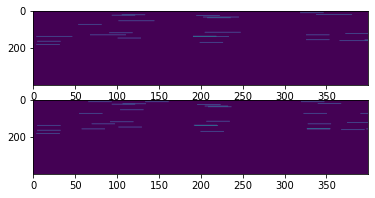

0.37155057202380337
0.878968253968254


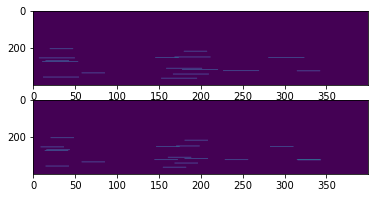

0.003882985695642332
0.7967171717171717


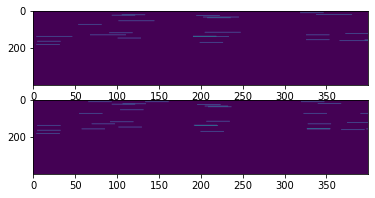

0.36609134194801113
0.8134920634920635


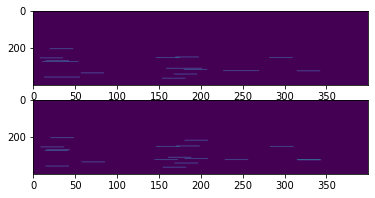

0.004660922726508316


In [10]:
## Training Rec

gamma = 10.
def f(x,gamma):
    return np.exp(x*gamma)/(np.exp(x*gamma)+1)
#f1 = @(x)(gamma*exp(gamma*x))./(exp(gamma*x)+1)-(gamma*exp(2*gamma*x))./(exp(gamma*x)+1).^2;

apicalFactorTrain = 1
apicalFactorTest = 0

nIterRec = 10

eta = 40.
eta_out = 0.1
etaW = .0
lttb.J = lttb.J*0

overlap = np.zeros((n_contexts,nIterRec))

for cont_index in range(2):
    
    lttb.cont = lttb.cont*0
    lttb.cont[cont_index] = 1
    if cont_index ==0:
        lttb.y_targ = lttb.y_targ_1
    else:
        lttb.y_targ = lttb.y_targ_2

    
    ###### Online-Training

    #initialize simulation
    
    
    for iter in range(nIterRec):
    
        #run simulation
        dH = 0
        
        lttb.initialize(par)

        for t in range(lttb.T-2):
            
            
            lttb.step_mult_cont(apicalFactor = apicalFactorTrain)

            dH = dH*(1-dt/tau_m) + dt/tau_m*lttb.S_filt[:,t]

            #DJ = np.outer(( lttb.S_apic_dist[:,t+1] - f(lttb.VapicRec[:,t],gamma) )*lttb.S_wind_soma[:,t+1] *(1-lttb.S_apic_dist[:,t]) ,dH)
            DJ = np.outer(( lttb.S_apic_dist[:,t+1] - f(lttb.VapicRec[:,t],gamma) )*lttb.S_wind_soma[:,t+1] *(1-lttb.S_apic_dist[:,t]) ,dH)
            lttb.J =  lttb.J + eta*DJ

            SR = lttb.S_filtRO[:,t+1]#lttb.B_filt_rec[:,t+1]#
            Y = lttb.Jout@SR
            DJRO = np.outer(lttb.y_targ[:,t+1] - Y,SR.T)
            lttb.Jout =  lttb.Jout + eta_out*DJRO
            
        #W_TARG.append(lttb.S_wind_targ)
        
    ###### Test
    
        if cont_index==1:#iter%5==0:

            for cont_index_ in range(2):

                lttb.cont = lttb.cont*0
                lttb.cont[cont_index_] = 1

                if cont_index_ ==0:
                    lttb.y_targ = lttb.y_targ_1
                else:
                    lttb.y_targ = lttb.y_targ_2

                lttb.initialize(par)

                #run simulation

                for t in range(lttb.T-2):

                    lttb.step_mult_cont(apicalFactor = apicalFactorTest)

                overlap[cont_index_,iter]=(np.sum(np.abs(W_TARG[cont_index_]*lttb.S_wind_pred))/np.sum(np.abs(W_TARG[cont_index_])) )

                #overlap[cont_index,iter]=(np.sum(np.abs((W_TARG[cont_index]-.5)*(lttb.S_wind_pred - 0.5) ))/np.sum(np.abs(W_TARG[cont_index])) )/np.sum(np.abs(lttb.S_wind_pred)) 

                print(overlap[cont_index_,iter])

                SR = lttb.S_filtRO[:,1:-2]# lttb.B_filt_rec[:,1:-2]#
                Y = lttb.Jout@SR
                mse_rec_train = np.std(lttb.y_targ[:,1:-2] - Y)**2

                plt.figure(figsize=(6,3))
                plt.subplot(211)
                plt.imshow(lttb.S_wind_pred[0:400,:],aspect='auto')
                plt.subplot(212)
                plt.imshow(W_TARG[cont_index_][0:400,:],aspect='auto')
                plt.show()

                print(mse_rec_train)

Text(0.5, 0, 'iteration')

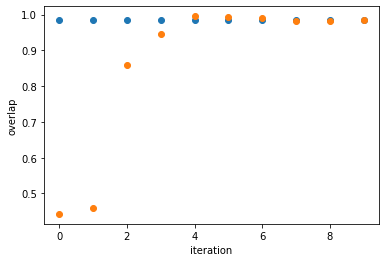

In [15]:
plt.figure()
plt.plot(overlap.T,'o')
plt.ylabel('overlap')
plt.xlabel('iteration')

